In [1]:
# Importing required librares fro eda and encoding

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder

In [2]:
# reading the data set

df = pd.read_csv('Cleaned_new_data.csv')
df

,fuel_type,body_type,kilometers_driven,transmission,owner_no,manufacturer,model,model_year,central_variant_id,variant_name,...,gear_box,drive_type,steering_type,front_brake_type,rear_brake_type,tyre_type,alloy_wheel_size,no_of_doors,cargo_volumn,City
0,Petrol,sedan,70000.0,Automatic,3,Toyota,Toyota Camry,2014,2123,Hybrid,...,6.0,fwd,power,ventilated disc,solid disc,tubeless radial,17.0,4.0,350.0,Kolkata
1,Petrol,hatchback,23981.0,Manual,1,Datsun,Datsun RediGO,2017,5236,T Option,...,5.0,2wd,power,disc,drum,tubeless radial,16.0,5.0,222.0,Kolkata
2,Petrol,suv,7100.0,Automatic,1,Renault,Renault Kiger,2021,8352,RXT AMT,...,5.0,unknown,electric,disc,drum,tubeless radial,16.0,5.0,405.0,Kolkata
3,Petrol,hatchback,71574.0,Manual,2,Hyundai,Hyundai i20,2011,1642,1.2 Sportz,...,5.0,fwd,power,disc,drum,tubeless radial,14.0,5.0,295.0,Kolkata
4,Diesel,suv,50000.0,Automatic,2,Audi,Audi Q3,2014,99,35 TDI Quattro Premium,...,7.0,awd,power,ventilated disc,drum,tubeless radial,16.0,5.0,460.0,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,hatchback,120000.0,Manual,1,Chevrolet,Chevrolet Beat,2011,438,LT,...,5.0,fwd,power,disc,drum,tubeless radial,14.0,5.0,170.0,Jaipur
8365,Petrol,hatchback,70000.0,Manual,1,Maruti,Maruti Alto,2007,3917,STD,...,5.0,2wd,manual,disc,drum,tubeless radial,12.0,5.0,350.0,Jaipur
8366,Petrol,suv,20000.0,Manual,1,Renault,Renault Kiger,2022,8350,RXZ,...,5.0,unknown,electric,disc,drum,tubeless radial,16.0,5.0,405.0,Jaipur
8367,Petrol,hatchback,40000.0,Manual,1,Maruti,Maruti Alto,2009,3904,Std,...,5.0,2wd,manual,disc,drum,tubeless radial,12.0,5.0,350.0,Jaipur


In [3]:
df.isna().sum()

fuel_type               0
body_type               0
kilometers_driven       0
transmission            0
owner_no                0
manufacturer            0
model                   0
model_year              0
central_variant_id      0
variant_name            0
price                   0
car_links               0
features               65
registration_year       0
insurance               0
rto                     6
engine                  0
max_power               0
torque                  0
wheel_size              0
seats                   0
color                   0
engine_type             0
no_of_cylinders         0
values_per_cylinder     0
fuel_suppy_system       0
turbo_charger           0
length                  0
width                   0
height                  0
wheel_base              0
kerb_weight             0
gear_box                0
drive_type              0
steering_type           0
front_brake_type        0
rear_brake_type         0
tyre_type               0
alloy_wheel_

In [4]:
# dropping categorical columns with more unique values and which are difficult to encode and which might reduce model effficeincy 

df = df.drop(['features','variant_name','rto','engine_type','central_variant_id','fuel_suppy_system','car_links'], axis=1)

In [5]:
# checking categorical columns 

categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['fuel_type', 'body_type', 'transmission', 'manufacturer', 'model',
       'insurance', 'color', 'turbo_charger', 'drive_type', 'steering_type',
       'front_brake_type', 'rear_brake_type', 'tyre_type', 'City'],
      dtype='object')

In [6]:
#no of unique values in categorical columns

unique_values_counts = df[categorical_cols].nunique()
print(unique_values_counts)

fuel_type             5
body_type            11
transmission          2
manufacturer         33
model               315
insurance             6
color               153
turbo_charger        10
drive_type           10
steering_type         6
front_brake_type     11
rear_brake_type      14
tyre_type             5
City                  6
dtype: int64


In [10]:
# model and color has more unique values rather than encoding it, we can just drop this colums 
# drive_type, steering_type, front_brake_type, rear_brake_type are indeed add unnecessary in price prediction. 
# Encoding these features could significantly increase the dimensionality of the dataset (number of columns) without necessarily improving the model's accuracy.

In [7]:
df = df.drop(['model', 'color','drive_type','steering_type', 'front_brake_type', 'rear_brake_type'], axis=1)

Analysing the data

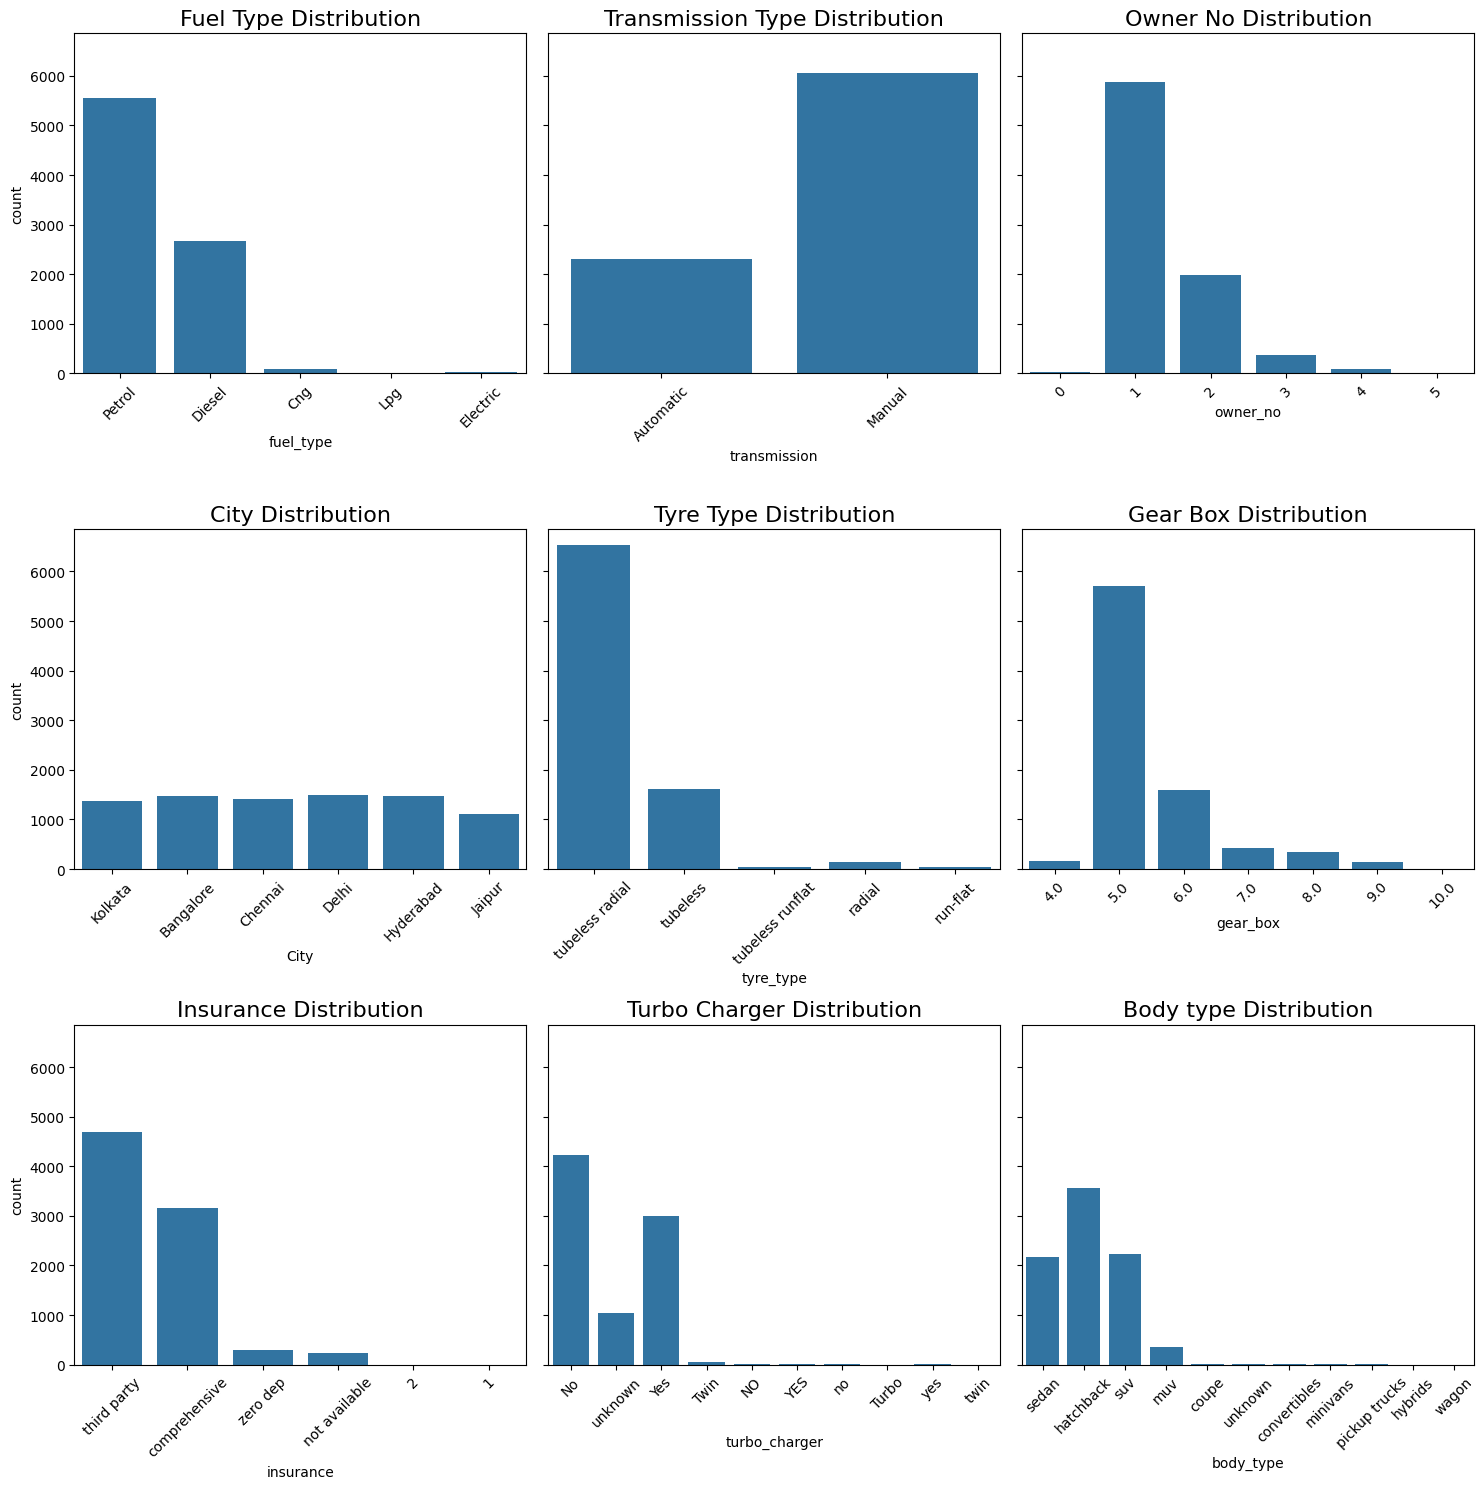

In [8]:
# List of column names and titles
columns = ['fuel_type', 'transmission', 'owner_no', 'City', 'tyre_type', 'gear_box', 'insurance',
           'turbo_charger','body_type']
titles = ['Fuel Type Distribution', 'Transmission Type Distribution', 'Owner No Distribution', 
          'City Distribution', 'Tyre Type Distribution', 'Gear Box Distribution', 
          'Insurance Distribution', 'Turbo Charger Distribution','Body type Distribution']

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True)

# Loop through the axes and plot
for i, ax in enumerate(axes.flat):
    sns.countplot(ax=ax, x=df[columns[i]])
    ax.set_title(titles[i], fontsize=16)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [9]:
# model year and registration year are similar and show same trends so i'm dropping registration_year

df = df.drop(['registration_year'], axis=1)

correlation analysis

In [10]:
# Identify numerical columns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)

Index(['kilometers_driven', 'owner_no', 'model_year', 'price', 'engine',
       'max_power', 'torque', 'wheel_size', 'seats', 'no_of_cylinders',
       'values_per_cylinder', 'length', 'width', 'height', 'wheel_base',
       'kerb_weight', 'gear_box', 'alloy_wheel_size', 'no_of_doors',
       'cargo_volumn'],
      dtype='object')


In [11]:
# Correlation of numerical features with 'price'
price_corr = df[numerical_cols].corr()['price'].sort_values(ascending=False)

# Display the correlations
print(price_corr)

price                  1.000000
max_power              0.631910
gear_box               0.543369
torque                 0.538640
kerb_weight            0.482208
wheel_base             0.459166
engine                 0.447830
width                  0.430309
length                 0.395691
alloy_wheel_size       0.352451
wheel_size             0.352451
no_of_cylinders        0.323686
cargo_volumn           0.247914
height                 0.156738
model_year             0.126002
seats                  0.055042
values_per_cylinder   -0.011016
owner_no              -0.043720
kilometers_driven     -0.050784
no_of_doors           -0.055108
Name: price, dtype: float64


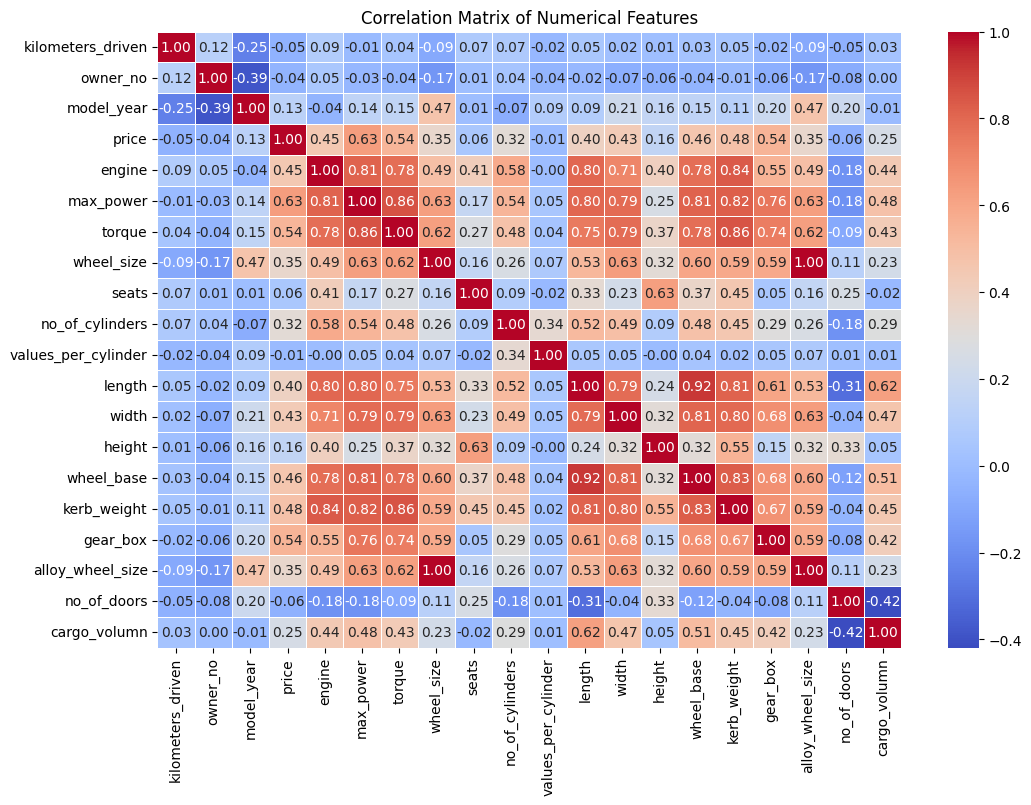

In [12]:
corr_matrix = df[numerical_cols].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [13]:
# dropping Features with a correlation lower than 0.2 with price

# wheel_size and alloy_wheel_size: Perfectly correlated, both at 0.554 with price. We can drop one, say alloy_wheel_size.

# width, length, kerb_weight, and wheel_base: These features are all highly correlated with each other. 
# Kerb weight, wheel base is highly corellateed with engine, max_power, torque 

# max_power and engine: Moderate correlation between each other, but both have meaningful correlations with price. It’s best to keep both.
# More features increase the dimensionality of the data, which can add computational cost and slow down model training.

In [14]:
# Columns to drop based on low correlation with price and redundancy with other features
columns_to_drop = [
    'seats', 'values_per_cylinder', 'no_of_doors', 
    'alloy_wheel_size', 'width', 'length', 'wheel_base','kerb_weight',
]

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Display remaining columns
print("Remaining columns after dropping:", df.columns)

Remaining columns after dropping: Index(['fuel_type', 'body_type', 'kilometers_driven', 'transmission',
       'owner_no', 'manufacturer', 'model_year', 'price', 'insurance',
       'engine', 'max_power', 'torque', 'wheel_size', 'no_of_cylinders',
       'turbo_charger', 'height', 'gear_box', 'tyre_type', 'cargo_volumn',
       'City'],
      dtype='object')


Normalizing Numerical features

In [16]:
# Using min max scaler as the data is not normally distributed

# Identify numerical columns, excluding the target variable 'price'
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('price')

# Initialize the scaler
scaler = MinMaxScaler()

# Scale only the selected numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [17]:
df.head()

,fuel_type,body_type,kilometers_driven,transmission,owner_no,manufacturer,model_year,price,insurance,engine,max_power,torque,wheel_size,no_of_cylinders,turbo_charger,height,gear_box,tyre_type,cargo_volumn,City
0,Petrol,sedan,0.012727,Automatic,0.6,Toyota,0.763158,9.75,third party,0.4988,0.240916,0.246332,0.555556,0.095238,No,0.271570,0.333333,tubeless radial,0.188935,Kolkata
1,Petrol,hatchback,0.004360,Manual,0.2,Datsun,0.842105,2.66,comprehensive,0.1598,0.051231,0.079508,0.444444,0.047619,No,0.357850,0.166667,tubeless radial,0.113596,Kolkata
2,Petrol,suv,0.001291,Automatic,0.2,Renault,0.947368,5.95,comprehensive,0.1998,0.082742,0.107903,0.444444,0.047619,unknown,0.448373,0.166667,tubeless radial,0.221307,Kolkata
3,Petrol,hatchback,0.013013,Manual,0.4,Hyundai,0.684211,2.23,third party,0.2394,0.099051,0.007809,0.222222,0.095238,No,0.306931,0.166667,tubeless radial,0.156563,Kolkata
4,Diesel,suv,0.009091,Automatic,0.4,Audi,0.763158,12.00,third party,0.3936,0.270178,0.443919,0.444444,0.095238,Yes,0.452617,0.500000,tubeless radial,0.253679,Kolkata


Encoding the data

In [18]:
# Apply label Encoding to nominal categorical variables

categorical_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()

for i in categorical_cols:
    df[i] = le.fit_transform(df[i].astype(str))

data_encoded=df
data_encoded

,fuel_type,body_type,kilometers_driven,transmission,owner_no,manufacturer,model_year,price,insurance,engine,max_power,torque,wheel_size,no_of_cylinders,turbo_charger,height,gear_box,tyre_type,cargo_volumn,City
0,4,7,0.012727,0,0.6,30,0.763158,9.75,4,0.4988,0.240916,0.246332,0.555556,0.095238,1,0.271570,0.333333,3,0.188935,5
1,4,2,0.004360,1,0.2,4,0.842105,2.66,2,0.1598,0.051231,0.079508,0.444444,0.047619,1,0.357850,0.166667,3,0.113596,5
2,4,8,0.001291,0,0.2,27,0.947368,5.95,2,0.1998,0.082742,0.107903,0.444444,0.047619,8,0.448373,0.166667,3,0.221307,5
3,4,2,0.013013,1,0.4,9,0.684211,2.23,4,0.2394,0.099051,0.007809,0.222222,0.095238,1,0.306931,0.166667,3,0.156563,5
4,1,8,0.009091,0,0.4,0,0.763158,12.00,4,0.3936,0.270178,0.443919,0.444444,0.095238,5,0.452617,0.500000,3,0.253679,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,4,2,0.021818,1,0.2,2,0.684211,1.08,4,0.2398,0.097963,0.122101,0.222222,0.095238,1,0.328147,0.166667,3,0.082990,4
8365,4,2,0.012727,1,0.2,20,0.578947,1.05,4,0.1592,0.037915,0.067676,0.000000,0.047619,1,0.243281,0.166667,3,0.188935,4
8366,4,8,0.003636,1,0.2,27,0.973684,8.50,4,0.1998,0.082742,0.107903,0.444444,0.047619,8,0.448373,0.166667,3,0.221307,4
8367,4,2,0.007273,1,0.2,20,0.631579,1.00,4,0.1592,0.037915,0.067676,0.000000,0.047619,1,0.243281,0.166667,3,0.188935,4


In [ ]:
Price Predction Model Development

In [23]:
#importing required librarief for price prediction

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [24]:
# defining target and features

X = data_encoded.drop(columns=['price'])  # Assuming 'price' is the target variable
y = data_encoded['price']

In [25]:
# Splitting into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (6695, 19)
Testing set shape: (1674, 19)


In [26]:
# Initializing  models

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [27]:
# Dictionary to store performance metrics
performance_metrics = {}

for model_name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    
    # Making predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Storing metrics
    performance_metrics[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R-squared": r2
    }

# Converting metrics to a DataFrame for easier comparison
performance_df = pd.DataFrame(performance_metrics).T
print("Model Performance Comparison:")
print(performance_df)

Model Performance Comparison:
                        MAE         MSE  R-squared
Linear Regression  5.315434  109.102355   0.375003
Decision Tree      2.664436   98.604876   0.435138
Random Forest      2.233925   52.455923   0.699504
Gradient Boosting  2.781517   53.098101   0.695826


In [29]:
best_model=RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [30]:
import pickle

In [31]:
# Saving the model
with open("car_price_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

In [32]:
# Saving the scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)